In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read Dataset
df = pd.read_csv("katalog_gempa.csv")

In [3]:
# Row & Col
df.shape

(92887, 13)

In [4]:
#Show Ascending Data
df.head(5)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Show Descinding Data
df.tail(5)

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92886,2023/01/26,00:00:35.181,-8.87,118.95,10,2.4,Sumbawa Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Cek Data Null
df.isnull().values.any()

True

In [7]:
df.drop(['tgl','ot','remark','strike1','dip1','rake1','strike2','dip2','rake2'], axis=1, inplace=True)
df

,lat,lon,depth,mag
0,-9.18,119.06,10,4.9
1,-6.55,129.64,10,4.6
2,-7.01,106.63,121,3.7
3,-3.30,127.85,10,3.2
4,-6.41,129.54,70,4.3
...,...,...,...,...
92882,3.24,127.18,10,4.0
92883,2.70,127.10,10,3.9
92884,-7.83,121.07,10,3.8
92885,3.00,127.16,10,4.1


In [8]:
col_names = ['latitude', 'longitude', 'depth', 'magnitude']


df.columns = col_names

col_names

['latitude', 'longitude', 'depth', 'magnitude']

In [9]:
import pandas as pd

# Anggaplah kolom magnitude ada dalam DataFrame df dan bernama 'magnitude'
# Gantilah 'magnitude' dengan nama kolom yang sesuai dengan dataset Anda
# misalnya, jika nama kolomnya adalah 'magnitude', maka gantilah 'df['magnitude']' dengan 'df['magnitude']'
df['eruption'] = df['magnitude'].apply(lambda x: 'Meletus' if x >= 7.0 else 'Tidak Meletus')

# Menampilkan DataFrame setelah penambahan kolom baru
df

,latitude,longitude,depth,magnitude,eruption
0,-9.18,119.06,10,4.9,Tidak Meletus
1,-6.55,129.64,10,4.6,Tidak Meletus
2,-7.01,106.63,121,3.7,Tidak Meletus
3,-3.30,127.85,10,3.2,Tidak Meletus
4,-6.41,129.54,70,4.3,Tidak Meletus
...,...,...,...,...,...
92882,3.24,127.18,10,4.0,Tidak Meletus
92883,2.70,127.10,10,3.9,Tidak Meletus
92884,-7.83,121.07,10,3.8,Tidak Meletus
92885,3.00,127.16,10,4.1,Tidak Meletus


In [10]:
# Mengubah 'Meletus' menjadi 1 dan 'Tidak Meletus' menjadi 0
df['eruption'] = df['eruption'].map({'Meletus': 1, 'Tidak Meletus': 0})

# Menampilkan DataFrame setelah perubahan
df

,latitude,longitude,depth,magnitude,eruption
0,-9.18,119.06,10,4.9,0
1,-6.55,129.64,10,4.6,0
2,-7.01,106.63,121,3.7,0
3,-3.30,127.85,10,3.2,0
4,-6.41,129.54,70,4.3,0
...,...,...,...,...,...
92882,3.24,127.18,10,4.0,0
92883,2.70,127.10,10,3.9,0
92884,-7.83,121.07,10,3.8,0
92885,3.00,127.16,10,4.1,0


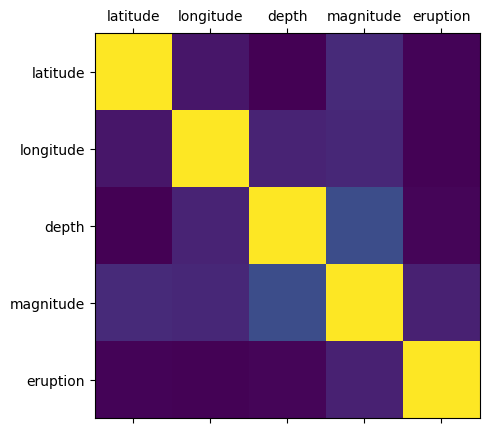

In [11]:
#Ploting Korelasi Data (Data Double)
def plot_corr(df, size=5):
    #Data Core Correlation
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

In [12]:
#Cek Korelasi Data
df.corr()

,latitude,longitude,depth,magnitude,eruption
latitude,1.000000,0.060283,-0.000180,0.118029,0.010556
longitude,0.060283,1.000000,0.100506,0.109827,0.006594
depth,-0.000180,0.100506,1.000000,0.235087,0.014299
magnitude,0.118029,0.109827,0.235087,1.000000,0.090279
eruption,0.010556,0.006594,0.014299,0.090279,1.000000


In [13]:
#Cek Data type (pastikan semua data numeric)
df.head(5)

,latitude,longitude,depth,magnitude,eruption
0,-9.18,119.06,10,4.9,0
1,-6.55,129.64,10,4.6,0
2,-7.01,106.63,121,3.7,0
3,-3.30,127.85,10,3.2,0
4,-6.41,129.54,70,4.3,0


In [14]:
#Jumlah distribusi

#Panjang data
num_obs = len(df)
#Cek jumlah true
num_true = len(df.loc[df['magnitude'] >= 7.0])
#Cek Jumlah False
num_false = len(df.loc[df['magnitude'] <= 7.0])
print("Jumlah berpotensi gunung meletus : {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Jumlah tidak terjadi gunung meletus : {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Jumlah berpotensi gunung meletus : 39 (0.04%)
Jumlah tidak terjadi gunung meletus : 92855 (99.97%)


In [18]:
#Split data
from sklearn.model_selection import train_test_split
feature_col_names = ['latitude', 'longitude', 'depth','magnitude']
predicted_class_names = ['eruption']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [19]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index)) * 100))

70.00% ada pada training set
30.00% ada pada test set


In [20]:
print("Jumlah berpotensi gunung meletus : {0} ({1:2.2f}%)".format(len(df.loc[df['magnitude'] == 1]), (len(df.loc[df['magnitude'] == 1])/len(df.index)) * 100.0))
print("Jumlah tidak terjadi gunung meletus : {0} ({1:2.2f}%)".format(len(df.loc[df['magnitude'] == 0]), (len(df.loc[df['magnitude'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Jumlah berpotensi gunung meletus : 8 (0.01%)
Jumlah tidak terjadi gunung meletus : 0 (0.00%)

Training True : 19 (0.03%)
Training False : 65001 (99.97%)

Training True : 20 (0.07%)
Training False : 27847 (99.93%)


In [21]:
df.head()

,latitude,longitude,depth,magnitude,eruption
0,-9.18,119.06,10,4.9,0
1,-6.55,129.64,10,4.6,0
2,-7.01,106.63,121,3.7,0
3,-3.30,127.85,10,3.2,0
4,-6.41,129.54,70,4.3,0


In [22]:
print("# rows in datframe {0}".format(len(df)))
print("# rows missing longitude: {0}".format(len(df.loc[df['longitude'] == 0])))
print("# rows missing latitude: {0}".format(len(df.loc[df['latitude'] == 0])))
print("# rows missing depth: {0}".format(len(df.loc[df['depth'] == 0])))

# rows in datframe 92887
# rows missing longitude: 0
# rows missing latitude: 91
# rows missing depth: 0


In [23]:
#Impute Data yang kosong dengan min 
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [24]:
df.head()

,latitude,longitude,depth,magnitude,eruption
0,-9.18,119.06,10,4.9,0
1,-6.55,129.64,10,4.6,0
2,-7.01,106.63,121,3.7,0
3,-3.30,127.85,10,3.2,0
4,-6.41,129.54,70,4.3,0


In [25]:
#Training Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [27]:
# Test Akurasi Data Train
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9997


In [29]:
# Test Akurasi Data Uji
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print("nb_predict_test", nb_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 ... 0 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Accuracy: 0.9998


In [ ]:
#Konfusion Matriks (Cek label)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

In [30]:
#Konfusion Matriks (Cek label)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[27843     4]
 [    1    19]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27847
           1       0.83      0.95      0.88        20

    accuracy                           1.00     27867
   macro avg       0.91      0.97      0.94     27867
weighted avg       1.00      1.00      1.00     27867



In [31]:
#Peningkatan peforma akurasi dengan RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42, n_estimators = 10)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [32]:
#Prediksi Data train
rf_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [33]:
#Prediksi Data Uji
rf_predict_test = rf_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 1.0000


In [34]:
#Konfusion Matriks (Cek label)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[27847     0]
 [    0    20]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27847
           1       1.00      1.00      1.00        20

    accuracy                           1.00     27867
   macro avg       1.00      1.00      1.00     27867
weighted avg       1.00      1.00      1.00     27867

